In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
trans = pd.read_csv('Book1.csv', index_col='dates')
trans

,Day,Total Amount,currency,Total Amount of transactions done,period of transaction,User_id
dates,,,,,,
1/1/2020,Monday,50000,Naira,3,Evening,1
1/3/2020,Wednesday,20000,Naira,2,Morning,1
1/10/2020,Wednesday,80000,Naira,6,Evening,1
1/15/2020,Monday,40000,Naira,3,Afternoon,1
1/16/2020,Tuesday,32000,Naira,2,Afternoon,1
1/18/2020,Thursday,10000,Naira,1,Morning,1
1/22/2020,Monday,6000,Naira,4,Afternoon,1
1/23/2020,Tuesday,55000,Naira,3,Evening,1
1/25/2020,Thursday,70000,Naira,4,Evening,1


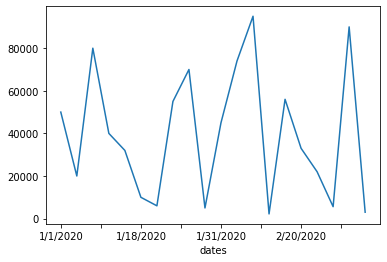

In [3]:
trans['Total Amount'].plot()

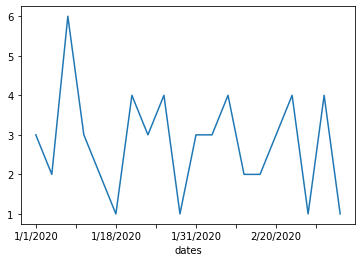

In [4]:
trans['Total Amount of transactions done'].plot()

In [5]:
trans_dates = trans.index.values

In [6]:
def date_ordering(dates):
    year = []
    month = []
    day = []
    for date in dates:
        date = str(date)
        str_date = date.split('/')
        str_date = list(str_date)
        year.append(int("".join(str_date[2]))) 
        month.append(int("".join(str_date[0])))
        day.append(int("".join(str_date[1])))
    return(year, month, day)

year, month, day =  date_ordering(trans_dates)   

In [7]:
trans['year'] = year
trans['month'] = month
trans['day'] = day

In [8]:
trans.head()

,Day,Total Amount,currency,Total Amount of transactions done,period of transaction,User_id,year,month,day
dates,,,,,,,,,
1/1/2020,Monday,50000,Naira,3,Evening,1,2020,1,1
1/3/2020,Wednesday,20000,Naira,2,Morning,1,2020,1,3
1/10/2020,Wednesday,80000,Naira,6,Evening,1,2020,1,10
1/15/2020,Monday,40000,Naira,3,Afternoon,1,2020,1,15
1/16/2020,Tuesday,32000,Naira,2,Afternoon,1,2020,1,16


In [9]:
days = { 'Monday': 1 , 'Tuesday': 2 , 'Wednesday': 3 , 'Thursday': 4 , 'Friday':5, 'Saturday': 6 , 'Sunday': 7}
period = { 'Morning': 1 , 'Afternoon': 2 , 'Evening': 3}
currency = { 'Naira': 0}
trans = trans.replace({'Day': days })
trans = trans.replace({'period of transaction': period })
trans = trans.replace({'currency': currency })

In [10]:
#trans.drop(['Day'], axis = 1, inplace =True)

In [11]:
trans.head()

,Day,Total Amount,currency,Total Amount of transactions done,period of transaction,User_id,year,month,day
dates,,,,,,,,,
1/1/2020,1,50000,0,3,3,1,2020,1,1
1/3/2020,3,20000,0,2,1,1,2020,1,3
1/10/2020,3,80000,0,6,3,1,2020,1,10
1/15/2020,1,40000,0,3,2,1,2020,1,15
1/16/2020,2,32000,0,2,2,1,2020,1,16


In [12]:
trans.shape

(20, 9)

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler(feature_range = (0,1))
scaled_set = sc.fit_transform(trans)

In [14]:
check = len(scaled_set)
check

20

In [15]:
time_steps = 7 # I used the analogy of 7 days in a week, meaning that, 
               #next weeks transactions are highly dependant on the current week(just saying)

In [16]:
# creating the time steps
x_train = []
y_train = []

for i in range(time_steps, check):
    x_train.append(scaled_set[i-time_steps:i, :])  
    y_train.append(scaled_set[i,:])
    
    

In [17]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train[:3]

array([[[0.        , 0.51508621, 0.        , 0.4       , 1.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.66666667, 0.19181034, 0.        , 0.2       , 0.        ,
         0.        , 0.        , 0.        , 0.06666667],
        [0.66666667, 0.83836207, 0.        , 1.        , 1.        ,
         0.        , 0.        , 0.        , 0.3       ],
        [0.        , 0.40732759, 0.        , 0.4       , 0.5       ,
         0.        , 0.        , 0.        , 0.46666667],
        [0.33333333, 0.32112069, 0.        , 0.2       , 0.5       ,
         0.        , 0.        , 0.        , 0.5       ],
        [1.        , 0.08405172, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.56666667],
        [0.        , 0.04094828, 0.        , 0.6       , 0.5       ,
         0.        , 0.        , 0.        , 0.7       ]],

       [[0.66666667, 0.19181034, 0.        , 0.2       , 0.        ,
         0.        , 0.        , 0.     

In [19]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 9)) # 9 is the no. 0f coloumns, x_train.shape[0] is the rows,
                                                                      # x_train.shape[1] is the timesteps

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [21]:
detector = Sequential()

In [22]:
# 3 layer LSTM 0f 35 neurons each.
detector.add(LSTM(units = 35, return_sequences = True, input_shape = (x_train.shape[1], 9)))
detector.add(Dropout(0.2))
detector.add(LSTM(units = 35, return_sequences =True))
detector.add(Dropout(0.2))
detector.add(LSTM(units = 35))
detector.add(Dropout(0.2))
detector.add(Dense(units=9))
detector.compile(optimizer = 'RMSprop', loss = 'mean_squared_error', metrics = ['accuracy'])

In [23]:
detector.fit(x_train, y_train, epochs = 90, batch_size = 9)

Epoch 1/90
13/13 [==============================] - 3s 205ms/step - loss: 0.2098 - accuracy: 0.3077
Epoch 2/90
13/13 [==============================] - 0s 4ms/step - loss: 0.1837 - accuracy: 0.1538
Epoch 3/90
13/13 [==============================] - 0s 4ms/step - loss: 0.1601 - accuracy: 0.1538
Epoch 4/90
13/13 [==============================] - 0s 4ms/step - loss: 0.1390 - accuracy: 0.1538
Epoch 5/90
13/13 [==============================] - 0s 6ms/step - loss: 0.1166 - accuracy: 0.0769
Epoch 6/90
13/13 [==============================] - 0s 4ms/step - loss: 0.0971 - accuracy: 0.2308
Epoch 7/90
13/13 [==============================] - 0s 4ms/step - loss: 0.0953 - accuracy: 0.1538
Epoch 8/90
13/13 [==============================] - 0s 4ms/step - loss: 0.0916 - accuracy: 0.3077
Epoch 9/90
13/13 [==============================] - 0s 4ms/step - loss: 0.0945 - accuracy: 0.2308
Epoch 10/90
13/13 [==============================] - 0s 6ms/step - loss: 0.0970 - accuracy: 0.2308
Epoch 11/90
13/13

13/13 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.1538
Epoch 84/90
13/13 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.3077
Epoch 85/90
13/13 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.2308
Epoch 86/90
13/13 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.0769
Epoch 87/90
13/13 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.2308
Epoch 88/90
13/13 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.3077
Epoch 89/90
13/13 [==============================] - 0s 3ms/step - loss: 0.0703 - accuracy: 0.2308
Epoch 90/90
13/13 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.3846


# Test Dataset.

In [24]:
test_data = pd.read_csv("Book2.csv", index_col='dates')
test_data.head()

,Day,Total Amount,currency,Total Amount of transactions done,period of transaction,User_id
dates,,,,,,
3/5/2020,Monday,70000,Naira,2,Evening,1
3/6/2020,Tuesday,20000,Naira,2,Morning,1
3/7/2020,Wednesday,30000,Naira,6,Morning,1
3/11/2020,Sunday,50000,Naira,1,Morning,1
3/14/2020,Wednesday,75000,Naira,2,Afternoon,1


In [25]:
test_dates = test_data.index.values

In [26]:
year, month, day =  date_ordering(test_dates) 

In [27]:
test_data['year'] = year
test_data['month'] = month
test_data['day'] = day

In [28]:
test_data.head()


,Day,Total Amount,currency,Total Amount of transactions done,period of transaction,User_id,year,month,day
dates,,,,,,,,,
3/5/2020,Monday,70000,Naira,2,Evening,1,2020,3,5
3/6/2020,Tuesday,20000,Naira,2,Morning,1,2020,3,6
3/7/2020,Wednesday,30000,Naira,6,Morning,1,2020,3,7
3/11/2020,Sunday,50000,Naira,1,Morning,1,2020,3,11
3/14/2020,Wednesday,75000,Naira,2,Afternoon,1,2020,3,14


In [29]:
test_data = test_data.replace({'Day': days })
test_data = test_data.replace({'period of transaction': period })
test_data = test_data.replace({'currency': currency })

In [30]:
test_data.head()

,Day,Total Amount,currency,Total Amount of transactions done,period of transaction,User_id,year,month,day
dates,,,,,,,,,
3/5/2020,1,70000,0,2,3,1,2020,3,5
3/6/2020,2,20000,0,2,1,1,2020,3,6
3/7/2020,3,30000,0,6,1,1,2020,3,7
3/11/2020,7,50000,0,1,1,1,2020,3,11
3/14/2020,3,75000,0,2,2,1,2020,3,14


In [31]:
data_total = pd.concat((trans, test_data), axis = 0)

In [32]:
inputs = data_total[len(data_total) - len(test_data) - time_steps :]#.values  

In [33]:
#inputs = inputs.reshape(-1,9)
inputs = sc.transform(inputs)

In [34]:
len(inputs)

18

In [35]:
x_test = []
for i in range(time_steps, 18):#25):                #This method of setting the range value is wrong, the range value is to be 
    x_test.append(inputs[i - time_steps: i, : ])    # from 7 to 25,this is because we are meant to predict for the next 18 days, 
                                                    # setting the range to (7, 25) gives an error that is yet to be resolved.
     

In [36]:
x_test= np.array(x_test)


In [37]:
#result = x_test.reshape([x_test.shape[0], x_test.shape[1],9])

In [38]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 9))

In [39]:
predicted_values_calc = detector.predict(x_test)
predicted_values = sc.inverse_transform(predicted_values_calc)

In [40]:
pred_df = pd.DataFrame(predicted_values, columns= test_data.columns)

In [41]:
pred_df = pred_df.round()
pred_df.head()

,Day,Total Amount,currency,Total Amount of transactions done,period of transaction,User_id,year,month,day
0,3.0,28355.0,0.0,3.0,1.0,1.0,2020.0,2.0,15.0
1,3.0,28483.0,0.0,3.0,1.0,1.0,2020.0,3.0,16.0
2,3.0,24924.0,0.0,2.0,1.0,1.0,2020.0,3.0,15.0
3,3.0,25529.0,0.0,2.0,1.0,1.0,2020.0,3.0,16.0
4,3.0,24969.0,0.0,2.0,1.0,1.0,2020.0,3.0,17.0


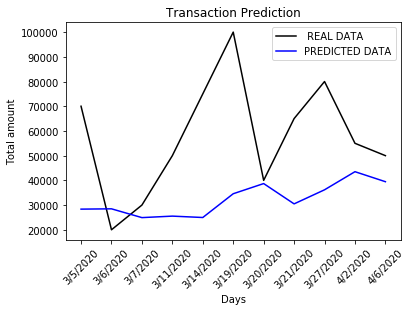

In [42]:
plt.plot(test_data['Total Amount'], color = 'black', label = ' REAL DATA')
plt.plot(pred_df['Total Amount'], color = 'blue', label= 'PREDICTED DATA')
plt.title('Transaction Prediction')
plt.xlabel('Days')
plt.xticks(rotation=45)
plt.ylabel('Total amount')
plt.legend()
plt.show()

In [61]:
def alert(real, pred):
    import itertools 
    from statistics import mean
    #from more_itertools import one
    real = real.tolist()
    pred = pred.tolist()
    zipped = zip(real, pred)
    for i, (l1,l2) in enumerate(zipped):
        if (l1-l2) >= round(mean(real[:i+1])):
            print(f"Something fishy has been detected, are you are aware of this transaction with an amount of {real[i]} Naira?")
            break
        

    
    
             
                  

In [62]:
alert(test_data['Total Amount'], pred_df['Total Amount'])

Something fishy has been detected, are you are aware of this transaction with an amount of 75000 Naira?


In [ ]:
# The ideology behind what I did in the function alert is,
# if at any point the difference between the real and pred is greater than the average of the previous real values(transaction)
# from that same point raise an alarm